# Target Problem


## Dataset

This dataset is from https://www.kaggle.com/datasets/jsphyg/tipping. This dataset is about a waiter who recorded information about every tip in one restaurant for a few months working in a restaurant, he registered 244 tips, and it is defined as a business case dataset. It is based on the sex of the person who pays the tip, time of the day, day of the week, the bill in dollars, size of the party, and whether there were smokers in the party. The features were pre-computed.

## Machine Learning Problem

In this case, we wanted to predict the tips by the specified features. due to the continuous values for the tips, it is defined as a regression problem and regression models are used to predict the continuous value. we must estimate the tips given to a waiter in a restaurant for providing meals. In the following, metrics such as mean absolute error will be used to evaluate the model.

# ML Workflow

1. Specify the model requirements:
    1. Data Cleaning
    2. Feature Engineering
    3. Model Training
    4. Model Evaluation
    
This ML problem requires regression model.


# Importing libraries

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

## Load Dataset

In [2]:
data=pd.read_csv("tips.csv")
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In this dataset, we have 4 categorical features and 3 numerical features

In [4]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<!-- about data describe: -->


## Visualization

Text(0.5, 1.0, 'Tips per day of week')

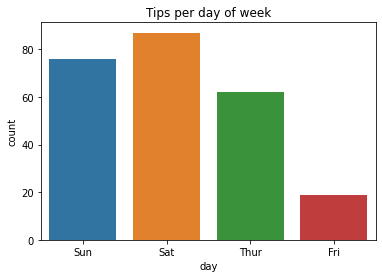

In [5]:
sns.countplot(x=data['day'], data=data)
plt.title("Tips per day of week")

According to the above, in saturday, he got tips more than 80 times but in friday, he received tips less than other days and it is approximately 20 times

<AxesSubplot:xlabel='sex', ylabel='count'>

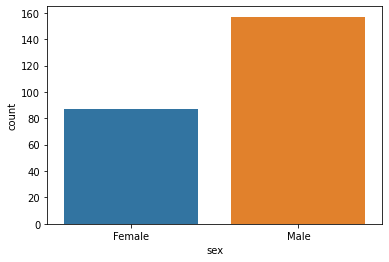

In [163]:
sns.countplot(x=data['sex'])

number of male are greater than female. so, they gave more tips than female

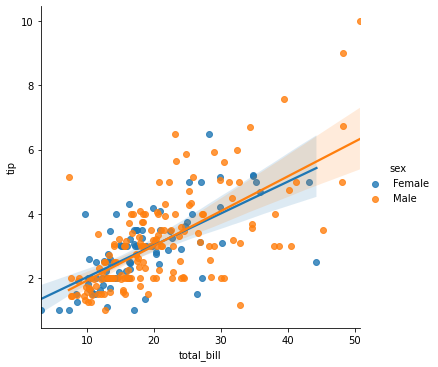

In [164]:
sns.lmplot(x='total_bill', y='tip', data=data, hue='sex');

As you can see, total_bill of male are higher than female and also male tend to tip more than female. the tip amount for male is greater than female.

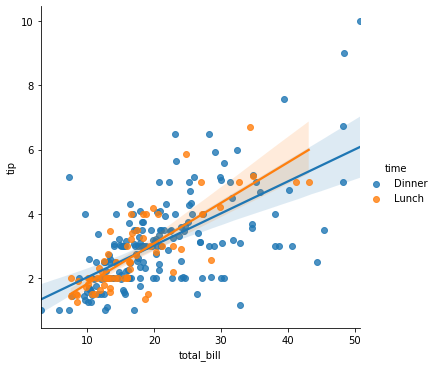

In [165]:
#3 
sns.lmplot(x='total_bill', y='tip', data=data, hue='time');

according to the above scatter plot, total_bill at the dinner time is greater than lunch time and also, amount of the tip at dinner time is higher than lunch time

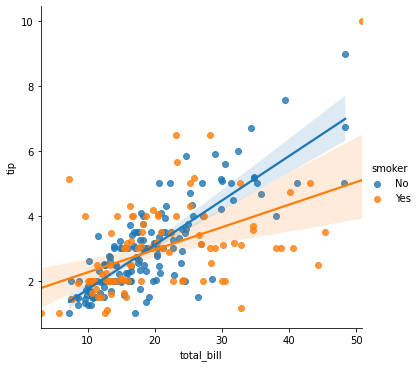

In [166]:
#4
sns.lmplot(x='total_bill', y='tip', data=data, hue='smoker');


number of non smoker are higher than smoker.

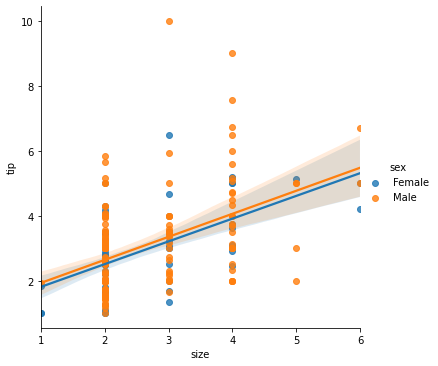

In [167]:
#5
sns.lmplot(x='size',y='tip',hue='sex',data=data)

the above plot shows that male tend to give tip more than female and the party with size of 2 gave more tip than other size.

C:\Users\16476\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tip'>

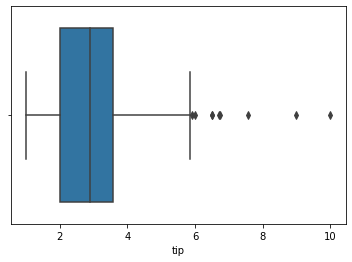

In [169]:
sns.boxplot(data['tip'])

# Data Cleaning 

In [5]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

there is no NULL values in any columns. There don't appear to be any NULL values in the data collection, so we won't have to deal with NaN values or any other cleanup.

In [6]:
data['sex'] = data['sex'].map({'Male':0, 'Female':1})
data['day'] = data['day'].map({'Thur':0, 'Fri':1, 'Sat':2, 'Sun':3})
data['time'] = data['time'].map({'Lunch':0, 'Dinner':1})
data['smoker'] = data['smoker'].map({'No':0, 'Yes':1})
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,0,3,1,2
1,10.34,1.66,0,0,3,1,3
2,21.01,3.50,0,0,3,1,3
3,23.68,3.31,0,0,3,1,2
4,24.59,3.61,1,0,3,1,4
...,...,...,...,...,...,...,...
239,29.03,5.92,0,0,2,1,3
240,27.18,2.00,1,1,2,1,2
241,22.67,2.00,0,1,2,1,2
242,17.82,1.75,0,0,2,1,2


<AxesSubplot:>

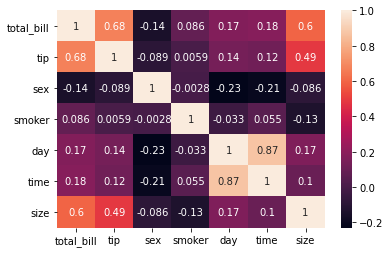

In [7]:
correlation = data.corr()
sns.heatmap(correlation, annot=True)

# Data Labeling

<!-- regression approach requires labeling and in this data, column of tip is a label -->

In [8]:
class_labels = data['tip'].values 
data.drop(['tip'], axis=1, inplace=True) 
data

,total_bill,sex,smoker,day,time,size
0,16.99,1,0,3,1,2
1,10.34,0,0,3,1,3
2,21.01,0,0,3,1,3
3,23.68,0,0,3,1,2
4,24.59,1,0,3,1,4
...,...,...,...,...,...,...
239,29.03,0,0,2,1,3
240,27.18,1,1,2,1,2
241,22.67,0,1,2,1,2
242,17.82,0,0,2,1,2


In [9]:
X = data.values
y= class_labels
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [10]:
print(X_train)

[[13.28  0.    0.    2.    1.    2.  ]
 [24.27  0.    1.    2.    1.    2.  ]
 [27.28  0.    1.    1.    1.    2.  ]
 ...
 [ 5.75  1.    1.    1.    1.    2.  ]
 [34.63  0.    1.    3.    1.    2.  ]
 [44.3   1.    1.    2.    1.    3.  ]]


# Feature Engineering

This dataset has a pre-computed feature and feature smoker has a low corrolation, so in feature engineering, the smoker feature will be eliminated.

In [19]:
data.drop(['smoker'], axis=1, inplace=True)
data.head()

,total_bill,sex,day,time,size
0,16.99,1,3,1,2
1,10.34,0,3,1,3
2,21.01,0,3,1,3
3,23.68,0,3,1,2
4,24.59,1,3,1,4


In [106]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# Model Training

#### Linear Regression

In [107]:
Model_linearregression = LinearRegression().fit(X_train,y_train)

In [108]:
y_pred = Model_linearregression.predict(X_test)
y_pred

array([2.95915033, 1.9793852 , 3.93355525, 3.81512843, 2.17478172,
       2.65950784, 3.65751199, 2.30684737, 2.5469726 , 2.27028847,
       2.87845875, 2.10446382, 2.13402126, 2.33746574, 1.84729628,
       3.12055033, 2.97055543, 3.18916799, 2.61631688, 5.73865153,
       3.48064358, 3.26948544, 2.23303951, 1.98924641, 3.15115427,
       2.25680834, 2.12104595, 3.26905178, 3.17236483, 6.62813881,
       4.9784413 , 1.6371344 , 3.23322391, 2.82236266, 2.96117781,
       3.86625614, 1.97848176, 5.48228412, 2.37106691, 3.04713105,
       2.07990929, 2.49950599, 3.41299197, 2.3340929 , 1.94813896,
       0.93957882, 1.88172086, 3.08438206, 1.86676908])

In [184]:
errors = mean_absolute_error(y_test, y_pred)
errors*100

66.85728160722873

#### Decision Tree Regression

In [181]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
yhat = dt.predict(X_test)
mean_absolute_error(y_test, yhat)*100

88.24489795918369

#### Support Vector Regression

In [185]:
svreg = SVR(kernel='rbf')
svreg.fit(X_train, y_train)
y_svreg = svreg.predict(X_test)
mean_absolute_error(y_test, y_svreg)*100

56.988872745886674

In [211]:
svr = SVR(kernel='rbf')

par_grid = {
    'C': [1,1.5,2,3],
    'gamma': ['scale','auto'],
    'tol': [1e-4, 1e-2, 1e-3],
}

rsc = RandomizedSearchCV(estimator=svr, param_distributions= par_grid, cv=7, n_jobs=-1)
rsc.fit(X_train, y_train)

RandomizedSearchCV(cv=7, estimator=SVR(), n_jobs=-1,
                   param_distributions={'C': [1, 1.5, 2, 3],
                                        'gamma': ['scale', 'auto'],
                                        'tol': [0.0001, 0.01, 0.001]})

In [141]:
rsc.best_params_

{'tol': 0.01, 'gamma': 'scale', 'C': 1}

In [215]:
svr=SVR(kernel='rbf', gamma='scale',C=5 ,tol=0.01)
svr.fit(X_train,y_train)
y_predict=svr.predict(X_test)
mean_absolute_error(y_predict,y_test)*100

61.64769683696091

## Model Evaluation

In [217]:
# errors = mean_absolute_error(y_test, y_pred)
print(f'Linear Regression model mean absolute error: {mean_absolute_error(y_test, y_pred)*100:.3f}%')
print(f'Testing Accuracy: {Model_linearregression.score(X_test,y_test)*100:.2f}%')

Linear Regression model mean absolute error: 66.857%
Testing Accuracy: 44.29%


In [209]:
print(f'Decision Tree Regression model mean absolute error: {mean_absolute_error(y_test, yhat)*100:.3f}%')
# print(f'Testing Accuracy: {dt.score(X_test,y_test)*100:.2f}%')

Decision Tree Regression model evaluation: 88.245%


In [207]:
print(f'Support Vector Regression model mean absolute error: {mean_absolute_error(y_test, y_svreg)*100:.3f}%')
print(f'Testing Accuracy: {svreg.score(X_test,y_test)*100:.2f}%')

Support Vector Regression model evaluation: 56.989%
Testing Accuracy: 57.33%


In [218]:
print(f'Support Vector Regression model mean absolute error: {mean_absolute_error(y_predict,y_test)*100:.3f}%')
print(f'Testing Accuracy: {svr.score(X_test,y_test)*100:.2f}%')

Support Vector Regression model mean absolute error: 61.648%
Testing Accuracy: 50.73%


## References

https://www.kaggle.com/code/sevdanurgenc/tips-dataset-validation

https://www.kaggle.com/code/saadarbani/waiter-s-tip-analysis

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

https://thecleverprogrammer.com/2022/02/01/waiter-tips-prediction-with-machine-learning/